In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.datasets import make_regression
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [2]:
f=r'C:\Users\Naresh\Downloads\water_dataX.csv'
data = pd.read_csv(f,encoding='latin-1')

In [3]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


In [4]:
data["Temp"]=pd.to_numeric(data["Temp"],errors='coerce')
data["D.O. (mg/l)"]=pd.to_numeric(data["D.O. (mg/l)"],errors='coerce')
data["PH"]=pd.to_numeric(data["PH"],errors='coerce')
data["CONDUCTIVITY (µmhos/cm)"]=pd.to_numeric(data["CONDUCTIVITY (µmhos/cm)"],errors='coerce')
data["B.O.D. (mg/l)"]=pd.to_numeric(data["B.O.D. (mg/l)"],errors='coerce')
data["NITRATENAN N+ NITRITENANN (mg/l)"]=pd.to_numeric(data["NITRATENAN N+ NITRITENANN (mg/l)"],errors='coerce')
data["TOTAL COLIFORM (MPN/100ml)Mean"]=pd.to_numeric(data["TOTAL COLIFORM (MPN/100ml)Mean"],errors='coerce')

In [5]:
data["Temp"].fillna(data["Temp"].mean(),inplace=True)
data["D.O. (mg/l)"].fillna(data["D.O. (mg/l)"].mean(),inplace=True)
data["PH"].fillna(data["PH"].mean(),inplace=True)
data["CONDUCTIVITY (µmhos/cm)"].fillna(data["CONDUCTIVITY (µmhos/cm)"].mean(),inplace=True)
data["B.O.D. (mg/l)"].fillna(data["B.O.D. (mg/l)"].mean(),inplace=True)
data["NITRATENAN N+ NITRITENANN (mg/l)"].fillna(data["NITRATENAN N+ NITRITENANN (mg/l)"].mean(),inplace=True)
data["TOTAL COLIFORM (MPN/100ml)Mean"].fillna(data["TOTAL COLIFORM (MPN/100ml)Mean"].mean(),inplace=True)
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [6]:
data=data.rename(columns={'D.O. (mg/l)':'do'})
data=data.rename(columns={'PH':'ph'})
data=data.rename(columns={'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns={'B.O.D. (mg/l)':'bod'})
data=data.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
data=data.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
data=data.rename(columns={'LOCATIONS':'location'})
data=data.rename(columns={'STATION CODE':'station'})
data=data.rename(columns={'STATE':'state'})

In [7]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,3428,5500.0,2014


In [8]:
data.tail()

,station,location,state,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),tc,year
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.7,0.518000,0.518,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.6,0.155000,0.155,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.2,1.623079,NAN,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.3,1.623079,NAN,562.0,2003
1990,1726,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29.000000,7.6,110.0,5.7,1.1,1.623079,NAN,546.0,2003


In [9]:
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)
                                 else(80 if (8.6>=x>=8.5) or (6.9>=x>=6.8)
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                                else 0)))))


data['ndo']=data.do.apply(lambda x: (100 if (x>=6)
                                  else(80 if (6>=x>=5.1)
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3)
                                              else 0)))))

data['nco']=data.tc.apply(lambda x: (100 if (5>=x>=0)
                                          else(80 if (50>=x>=5)
                                            else(60 if (500>=x>=50)
                                              else(40 if (10000>=x>=500)
                                                else 0)))))


data['nbdo']=data.bod.apply(lambda x: (100 if (3>=x>=0)
                                          else(80 if (6>=x>=3)
                                            else(60 if (80>=x>=6)
                                              else(40 if (125>=x>=80)
                                                else 0)))))

data['nec']=data.co.apply(lambda x: (100 if (75>=x>=0)
                                          else(80 if (150>=x>=75)
                                            else(60 if (225>=x>=150)
                                              else(40 if (300>=x>=225)
                                                else 0)))))

data['nna']=data.na.apply(lambda x: (100 if (20>=x>=0)
                                          else(80 if (50>=x>=20)
                                            else(60 if (100>=x>=50)
                                              else(40 if (200>=x>=100)
                                                else 0)))))

In [10]:
data['wph']=data.npH*0.165
data['wdo']=data.ndo*0.281
data['wbdo']=data.nbdo*0.234
data['wec']=data.nec*0.009
data['wna']=data.nna*0.028
data['wco']=data.nco*0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco


In [11]:
data

,station,location,state,Temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,11,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,4953,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,3243,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,5382,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,3428,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,0.518,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,0.155,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,NAN,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,NAN,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [12]:
data.to_csv('quality.csv')

In [13]:
X= data[['do','ph','co','bod','na','tc','year']]
Y= data['wqi']

In [14]:
Y.value_counts()

wqi
88.38    80
82.94    76
82.04    66
83.70    64
87.66    63
         ..
74.06     1
62.42     1
28.66     1
61.26     1
56.14     1
Name: count, Length: 268, dtype: int64

In [19]:
data

,Values
0,88.38
1,82.94
2,82.04
3,83.70
4,87.66
5,74.06
6,62.42
7,28.66
8,61.26
9,56.14


In [20]:
new=pd.read_csv("quality.csv")

In [21]:
new

,Unnamed: 0,station,location,state,Temp,do,ph,co,bod,na,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [22]:
import pandas as pd

# Convert 'wqi' column to numeric type
data = pd.DataFrame({'Values': [88.38, 82.94, 82.04, 83.70, 87.66, 74.06, 62.42, 28.66, 61.26, 56.14]})



# Define bins and labels
bins = [0, 25, 50, 75, 100]  # Define bin boundaries
labels = ['Poor', 'Fair', 'Good', 'Excellent']  # Define labels for each bin

# Create categorical variable by binning
new['wqi_category'] = pd.cut(new['wqi'], bins=bins, labels=labels)


In [23]:
new

,Unnamed: 0,station,location,state,Temp,do,ph,co,bod,na,...,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi,wqi_category
0,0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,...,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46,Excellent
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,...,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96,Excellent
2,2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,...,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28,Excellent
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,...,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34,Good
4,4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,...,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,Good
1987,1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,Good
1988,1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,Good
1989,1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,Good


In [25]:
X= new[['do','ph','co','bod','na','tc','year']]
Y= new['wqi_category']

In [27]:
X

,do,ph,co,bod,na,tc,year
0,6.7,7.5,203.0,6.940049,0.100000,27.0,2014
1,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014
2,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014
3,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014
4,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014
...,...,...,...,...,...,...,...
1986,7.9,738.0,7.2,2.700000,0.518000,202.0,2003
1987,7.5,585.0,6.3,2.600000,0.155000,315.0,2003
1988,7.6,98.0,6.2,1.200000,1.623079,570.0,2003
1989,7.7,91.0,6.5,1.300000,1.623079,562.0,2003


In [28]:
Y

0       Excellent
1       Excellent
2       Excellent
3            Good
4       Excellent
          ...    
1986         Good
1987         Good
1988         Good
1989         Good
1990         Good
Name: wqi_category, Length: 1991, dtype: category
Categories (4, object): ['Poor' < 'Fair' < 'Good' < 'Excellent']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=42)

In [30]:
X_test.shape

(664, 7)

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators= 100, criterion="entropy")
classifier=classifier.fit(X_train,Y_train.values.ravel())

In [32]:
y_pred=classifier.predict(X_test)
y_pred

array(['Excellent', 'Excellent', 'Good', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Good',
       'Excellent', 'Excellent', 'Good', 'Good', 'Excellent', 'Good',
       'Excellent', 'Good', 'Excellent', 'Excellent', 'Excellent', 'Good',
       'Good', 'Excellent', 'Fair', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Good', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Good',
       'Good', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Excellent',
       'Good', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Good',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Good',
       'Excellent', 'Fair', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Good', 'Good', 'Excellent', 'Excellent', 'Excellent',
       'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent',
      

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test.values.ravel(),y_pred)

In [34]:
cm

array([[404,   0,   4,   0],
       [  0,  22,   8,   0],
       [ 15,   3, 207,   0],
       [  0,   1,   0,   0]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
clf_report=classification_report(Y_test.values.ravel(),y_pred)

C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print(clf_report)

              precision    recall  f1-score   support

   Excellent       0.96      0.99      0.98       408
        Fair       0.85      0.73      0.79        30
        Good       0.95      0.92      0.93       225
        Poor       0.00      0.00      0.00         1

    accuracy                           0.95       664
   macro avg       0.69      0.66      0.67       664
weighted avg       0.95      0.95      0.95       664



In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, Y_train)
nb_pred = nb_classifier.predict(X_test_scaled)

In [40]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, Y_train)
svm_pred = svm_classifier.predict(X_test_scaled)


In [42]:
nb_accuracy = accuracy_score(Y_test, nb_pred)
svm_accuracy = accuracy_score(Y_test, svm_pred)
rforest_accuracy=accuracy_score(Y_test,y_pred)



In [43]:
classifiers = ['Naive Bayes', 'SVM', ' RandomForest']
accuracies = [nb_accuracy, svm_accuracy,  rforest_accuracy]

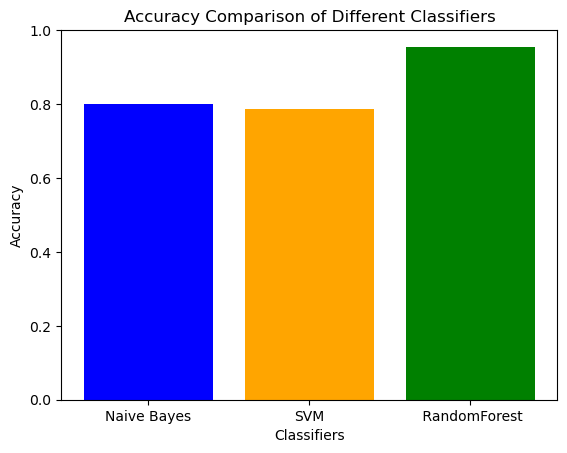

In [44]:
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0, 1)
plt.show()

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [46]:
log_reg = LogisticRegression()

In [47]:
log_reg.fit(X_train, Y_train)

C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
log_pred = log_reg.predict(X_test)

In [49]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, log_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, log_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, log_pred))


Accuracy: 0.7530120481927711
Classification Report:
              precision    recall  f1-score   support

   Excellent       0.75      0.99      0.85       408
        Fair       0.00      0.00      0.00        30
        Good       0.76      0.44      0.55       225
        Poor       0.00      0.00      0.00         1

    accuracy                           0.75       664
   macro avg       0.38      0.36      0.35       664
weighted avg       0.72      0.75      0.71       664

Confusion Matrix:
[[402   0   6   0]
 [  6   0  24   0]
 [127   0  98   0]
 [  0   0   1   0]]


C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
log_accuracy=accuracy_score(Y_test,log_pred)

In [51]:
classifiers = ['Naive Bayes', 'SVM', ' RandomForest',"LogisticRegression"]
accuracies = [nb_accuracy, svm_accuracy,  rforest_accuracy,log_accuracy]

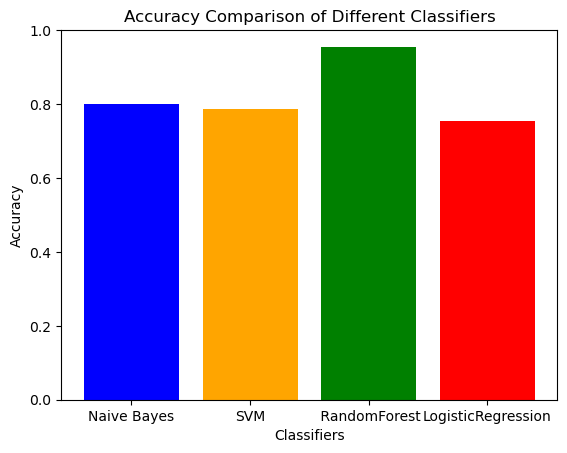

In [52]:
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0, 1)
plt.show()

In [53]:
ex=new

In [54]:
ex

,Unnamed: 0,station,location,state,Temp,do,ph,co,bod,na,...,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi,wqi_category
0,0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,...,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46,Excellent
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,...,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96,Excellent
2,2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,...,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28,Excellent
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,...,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34,Good
4,4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,...,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,Good
1987,1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,Good
1988,1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,Good
1989,1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,Good


In [55]:
from sklearn.preprocessing import LabelEncoder


In [56]:
le = LabelEncoder()
col = ['wqi_category' ]
for i in col:
    ex[i] = le.fit_transform(ex[i]).astype(int)

In [57]:
ex

,Unnamed: 0,station,location,state,Temp,do,ph,co,bod,na,...,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi,wqi_category
0,0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,...,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46,0
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,...,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96,0
2,2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,...,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28,0
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,...,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34,2
4,4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,...,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,2
1987,1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,...,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06,2
1988,1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,2
1989,1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,...,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44,2


In [58]:
XX= ex[['do','ph','co','bod','na','tc','year']]
YY= ex['wqi_category']

In [59]:
XX

,do,ph,co,bod,na,tc,year
0,6.7,7.5,203.0,6.940049,0.100000,27.0,2014
1,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014
2,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014
3,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014
4,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014
...,...,...,...,...,...,...,...
1986,7.9,738.0,7.2,2.700000,0.518000,202.0,2003
1987,7.5,585.0,6.3,2.600000,0.155000,315.0,2003
1988,7.6,98.0,6.2,1.200000,1.623079,570.0,2003
1989,7.7,91.0,6.5,1.300000,1.623079,562.0,2003


In [60]:
YY

0       0
1       0
2       0
3       2
4       0
       ..
1986    2
1987    2
1988    2
1989    2
1990    2
Name: wqi_category, Length: 1991, dtype: int32

In [61]:
YY.value_counts()

wqi_category
0    1217
2     677
1      93
3       4
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
XX_train,XX_test,YY_train,YY_test=train_test_split(XX,YY,test_size=1/3,random_state=42)

In [63]:
XX_test.shape

(664, 7)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [65]:
scaler = StandardScaler()
XX_train_scaled = scaler.fit_transform(XX_train)
XX_test_scaled = scaler.transform(XX_test)

In [66]:
nb_classifier = GaussianNB()
nb_classifier.fit(XX_train_scaled, YY_train)
nb_pred = nb_classifier.predict(XX_test_scaled)

In [67]:
svm_classifier = SVC()
svm_classifier.fit(XX_train_scaled, YY_train)
svm_pred = svm_classifier.predict(XX_test_scaled)


In [78]:
lstm_classifier = Sequential([
    LSTM(64, input_shape=(XX_train_scaled.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
lstm_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_classifier.fit(np.expand_dims(XX_train_scaled, axis=-1), YY_train, epochs=100, batch_size=32, validation_split=0.2)
lstm_pred_prob = lstm_classifier.predict(np.expand_dims(XX_test_scaled, axis=-1))
lstm_pred = (lstm_pred_prob > 0.5).astype(int).flatten()

Epoch 1/100
34/34 [==============================] - 7s 51ms/step - loss: 0.6466 - accuracy: 0.0763 - val_loss: 0.5793 - val_accuracy: 0.0526
Epoch 2/100
34/34 [==============================] - 0s 14ms/step - loss: 0.4783 - accuracy: 0.0490 - val_loss: 0.2264 - val_accuracy: 0.0752
Epoch 3/100
34/34 [==============================] - 0s 13ms/step - loss: 0.0873 - accuracy: 0.1800 - val_loss: -0.3818 - val_accuracy: 0.3910
Epoch 4/100
34/34 [==============================] - 0s 14ms/step - loss: -0.2908 - accuracy: 0.4307 - val_loss: -0.6565 - val_accuracy: 0.4662
Epoch 5/100
34/34 [==============================] - 0s 14ms/step - loss: -0.5753 - accuracy: 0.4713 - val_loss: -0.8977 - val_accuracy: 0.4248
Epoch 6/100
34/34 [==============================] - 1s 15ms/step - loss: -0.8168 - accuracy: 0.3836 - val_loss: -1.2271 - val_accuracy: 0.4023
Epoch 7/100
34/34 [==============================] - 1s 41ms/step - loss: -1.0250 - accuracy: 0.4166 - val_loss: -1.3877 - val_accuracy: 0.37

In [79]:
nb_accuracy = accuracy_score(YY_test, nb_pred)
svm_accuracy = accuracy_score(YY_test, svm_pred)
lstm_accuracy = accuracy_score(YY_test, lstm_pred)
log_accuracy=accuracy_score(Y_test,log_pred)
rforest_accuracy=accuracy_score(Y_test,y_pred)

In [80]:
classifiers = ['Naive Bayes', 'SVM', ' RandomForest',"LogisticRegression","LSTM"]
accuracies = [nb_accuracy, svm_accuracy,  rforest_accuracy,log_accuracy,lstm_accuracy]

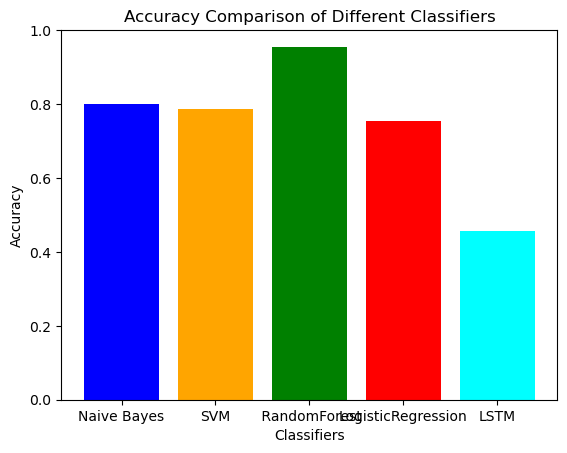

In [81]:
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red','cyan'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0, 1)
plt.show()

In [73]:
print(lstm_accuracy)

0.4563253012048193


In [122]:
do = float(input("Enter the value for 'do': "))
ph = float(input("Enter the value for 'ph': "))
co = float(input("Enter the value for 'co': "))
bod = float(input("Enter the value for 'bod': "))
na = float(input("Enter the value for 'na': "))
tc = float(input("Enter the value for 'tc': "))
year = int(input("Enter the value for 'year': "))

Enter the value for 'do':  6.7
Enter the value for 'ph':  7.5
Enter the value for 'co':  203.0
Enter the value for 'bod':  6.94004876796714
Enter the value for 'na':  0.1
Enter the value for 'tc':  27.0
Enter the value for 'year':  2014


In [123]:
future_prediction=classifier.predict([[do,ph,co,bod,na,tc,year]])
future_prediction

C:\Users\Naresh\.conda\envs\tf-new\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Excellent'], dtype=object)

In [124]:
import joblib

# Assuming you have already trained a model named 'model'
# Save the model to a file
joblib.dump(classifier, 'waterquality.pkl')

['waterquality.pkl']